***What is the best descriptive way to present different types of data?***
 <ul>
  <li>
You have the option to display each column with only one Metric or chart!</li>
    <ul>



***Let's start by importing the main libraries.***

In [391]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

***Next, we need a dataset to work with.***

In [392]:
df = pd.read_excel("MOCK_DATA.xlsx")

df.head(5) # Let's display the first 5 rows of DataFrame.

,Name,Grade,Net Profit $,Gender,Text,Salary
0,Rickie,58.998343,10000,Male,Aenean sit amet justo. Morbi ut odio. Cras mi ...,3000
1,Rickie,81.005238,11507,Female,"Nullam orci pede, venenatis non, sodales sed, ...",11743
2,Rickie,32.372294,13322,Male,Vivamus in felis eu sapien cursus vestibulum. ...,23063
3,Rickie,79.103587,14609,Male,Nulla facilisi. Cras non velit nec nisi vulput...,16246
4,Rickie,59.201410,15667,Female,Etiam vel augue. Vestibulum rutrum rutrum nequ...,27695




 <ul>
  <li>We will analyze each column separately from left to right.</li>
    <ul>
      <li>So what is the best way to represent the first column?</li>


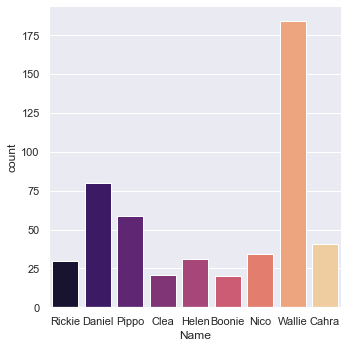

In [393]:
sns.catplot(x ="Name",kind = "count",palette= "magma",data = df)

***Now we will present the distribution of test scores from column 2***

<AxesSubplot:xlabel='Grade'>

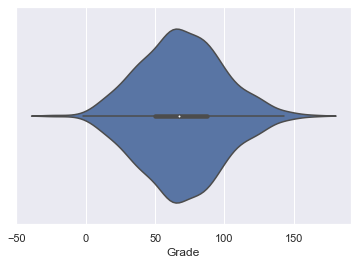

In [394]:
sns.set(style="darkgrid")
sns.violinplot(x = "Grade",data=df)

***Next, we have binary column, the perfect time to use a pie chart!***


<AxesSubplot:ylabel='Gender'>

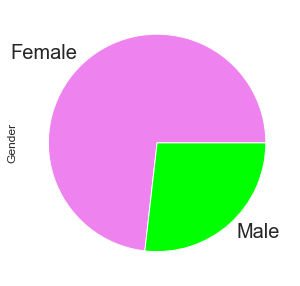

In [395]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

df.groupby('Gender').size().plot(kind='pie', textprops={'fontsize': 20},
                                 colors=['violet', 'lime'], ax=ax1,ylabel = 'Gender')

***We have come to the interesting part, how would you describe the "Net Profit" column?***

In [396]:
df["pct_change"] = df["Net Profit $"].pct_change() + 1
print("Geometric Mean: " +str(round(stats.gmean(df.iloc[1:,6],axis=0),2)))

from IPython.core.display import display, HTML
display(HTML("""<a href="https://corporatefinanceinstitute.com/resources/knowledge/other/what-is-geometric-mean/">For more details about geometric mean click here.</a>"""))

Geometric Mean: 1.01


In [397]:
# התפלגות נורמלית
normal_dist = np.random.randn(10000) 

def print_stat(array):
    print("↡↡↡--mean--↡↡↡")
    print(round(np.mean(normal_dist)))
    print("↡↡↡--std--↡↡↡") 
    print(round(np.std(normal_dist)))
    print("↡↡↡--median--↡↡↡")
    print(round(np.median(normal_dist)))
    print("↡↡↡--mode--↡↡↡")
    print(round(stats.mode(normal_dist)[0][0]))

print_stat(normal_dist)



↡↡↡--mean--↡↡↡
0
↡↡↡--std--↡↡↡
1
↡↡↡--median--↡↡↡
0
↡↡↡--mode--↡↡↡
-4


↡↡↡--mean--↡↡↡
3
↡↡↡--std--↡↡↡
3
↡↡↡--median--↡↡↡
3
↡↡↡--mode--↡↡↡
-9


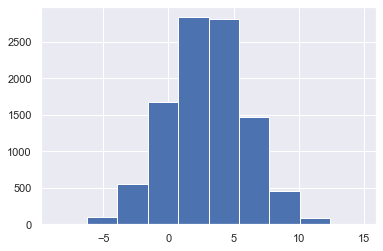

In [398]:
normal_dist = 3 * np.random.randn(10000) + 3 # ניתן לבצע הזזות 

plt.hist(normal_dist)

print_stat(normal_dist)

In [399]:
#  אחוזון ה80
np.percentile(normal_dist,80)

5.430051765147436

In [400]:


def remove_column_outliers(columnName,df):
    
    df_s = df
    df = df.sort_values(by=[columnName],ascending=False)
    df = df[[columnName]]

    z_scores = stats.zscore(df)
    abs_z = (np.abs(z_scores))
    filter = (abs_z < 1).all(axis = 1)

    if df.shape[0] != filter.sum():
        print("!!--We found Outliers--!!")
        print("----------------------------")
        print("↡↡↡--Top outliears--↡↡↡")
        print(df.head(3))
        print("----------------------------")
        print("↡↡↡-- Bottom outliears--↡↡↡")
        print(df.tail(3))
        

        decision = int(input("Do you want us to clean the outliers? 0 = no , 1 = yes, but not too many , 2 = yaa!! clean it all!"))

        if decision == 1:
            new_df = df[filter]
            return(new_df)
        elif decision == 2:
            num_slice = int(df.shape[0]*0.2)
            df_temp = df.abs()
            top =df.shape[0] - num_slice - 1
            bottom = num_slice 
            new_df2 = df_temp.loc[bottom:top]
            return new_df2
        else: 
            return(df_s)
    else:
        print("No outliers ;)")
        return(df_s)

    

In [401]:
from scipy import stats
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def deicide_trim_orNot(columnName,df):
    df = df.sort_values(by=[columnName],ascending=False)
    df = df[[columnName]]

    z_scores = stats.zscore(df)
    abs_z = (np.abs(z_scores))
    filter = (abs_z < 1).all(axis = 1)

    if df.shape[0] != filter.sum():
        trim = str(round(stats.trim_mean(df, 0.25)[0],2))
        return "the best kpi that describe your data is Trim Mean: " + trim   
    else:
        return("No outliers ;)  the best kpi that describe your data is: Mean" + str(df.mean()[0]))

########################################################

def normal_std(df):
   x = int(df.std())
   x = str(x)
   count = int(len(x))
   x = int(x)
   return x*10**(-abs((count-2)))

########################################################

def clean_dollar(df):
    df = df.astype(str)
    df= df.replace(r"\$","",regex= True)
    df= df.replace(r"\,","",regex=True)
    df= df.replace(r"\%","",regex=True)
    df = df.astype(float)
    return df

########################################################
def OurWordCloud(df,title = None,pic_shape = " "):
       stopwords = set(STOPWORDS)

       wordcloud = WordCloud(
           background_color="white",
           stopwords=stopwords,
           max_words=22,
           max_font_size=40,
           scale= 3,
           random_state=1).generate(str(df))

       fig = plt.figure(1,figsize=(10,10))
       plt.axis("off")
       if title:
           fig.suptitle(title,fontsize=15)
           fig.subplots_adjust(top = 2.3)
    
       plt.imshow(wordcloud)
       plt.show()
########################################################

def top_analyst(columnName,df):
    df_save = df
    df = df[[columnName]]

    if df.dtypes[0] == 'int' or df.dtypes[0] == 'float':
        if columnName.lower() == "salary":
            return "the best kpi that describe your data is Median: " +  str(round(df.median()[0]))
        elif normal_std(df) > 2:
            return deicide_trim_orNot(columnName,df_save)
        else:
            return "No outliers ;)  the best kpi that describe your data is : Mean " + str(round(df.mean()[0],2))  

    elif df.dtypes[0] == 'object':
        if "$" in df[columnName][1] or columnName.lower() == "Salary":
            user = int(input("now we talk money! salary = 1 money change over time = 0"))
            if user == 1:
                df = clean_dollar(df)
                return "the best kpi that describe your data is Median:  " +  str(round(df.median()[0]))

            elif user == 0:
                df = clean_dollar(df)
                df = df.pct_change() + 1
                df = df.loc[1:]
                return "the best kpi that describe your data is Geometric Mean: "+ str(round(stats.gmean(df)[0],3))

        elif "%" in df[columnName][1]:
            user= int(input("change over time? yes = 1 no = 0"))
            if user ==  1:
                df = clean_dollar(df)
                df = df.loc[1:] / 100
                return "the best kpi that describe your data is Geometric Mean: "+ str(round(stats.gmean(df)[0],3))
            else:
                df = clean_dollar(df)
                trim = str(round(stats.trim_mean(df, 0.25)[0],2))
                return "the best kpi that describe your data is Trim Mean: " + trim +"%"
        else:
            if len(df[columnName][0]) > 18:
                print("the best way to describe your data is by Word Cloud: ")
                return OurWordCloud(df[columnName])
            else:
               print("the best way to describe your data is by Histogram")
               return sns.catplot(x = columnName,kind = "count",palette= "magma",data = df)
            
    
df = pd.read_excel("test.xlsx")

print(top_analyst("profits",df))

df.head(10)

the best kpi that describe your data is Geometric Mean: 1.349


,manger name,id,test scores,salary,profits,p chagne%,details
0,tom,1,80,$100.00,$10000.00,0%,the person very good
1,tom,1,90,$200.00,$22000.00,220%,very good high
2,chen,2,43,$500.00,$32100.00,146%,need to work more
3,shani,3,25,$300.00,$42000.00,131%,very noesy high
4,sivan,4,6,"$1,000.00",$50000.00,119%,nice person
5,yossi,5,7,$500.00,$65000.00,130%,very good leader
6,tom,1,10,$300.00,$70000.00,108%,very very good high
7,sivan,4,120,$100.01,$81200.00,116%,high grades very impressive
